<a href="https://colab.research.google.com/github/lucarso120/Data-science-projects/blob/master/Fashion_DL_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

Import Dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


attribute class names for each class of target for later comparison


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Bot']

In [ ]:
train_images.shape


(60000, 28, 28)

Recognize images

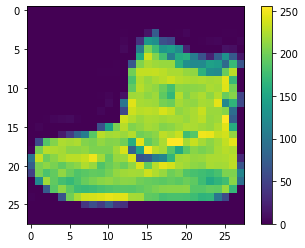

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Transform values of images - binarization. Leave them between 0 and 1 in roder to be in a B&W scale.

In [ ]:
train_images = train_images / 255
test_images = test_images  /255

Visualize train images set


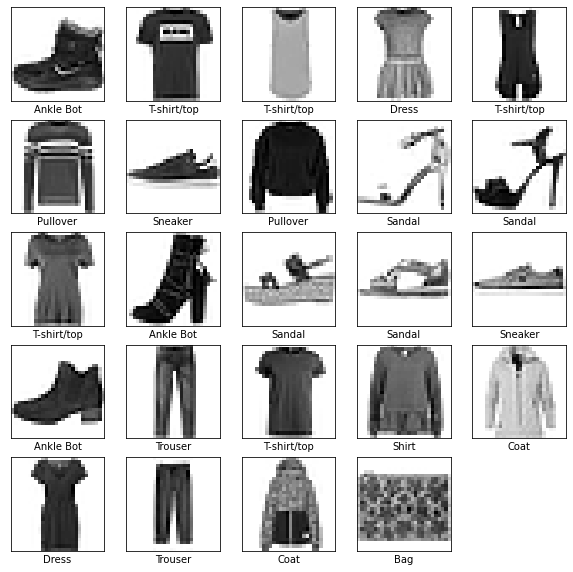

In [ ]:
plt.figure(figsize=(10,10))
for i in range(24):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=[28,28]),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6345 - accuracy: 0.7755
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3831 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3175 - accuracy: 0.8827
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2982 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2723 - accuracy: 0.8985
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2540 - accuracy: 0.9063
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.234

In [ ]:
predict = model.predict(test_images)

predict[0]

array([2.30585018e-09, 2.24477333e-07, 1.13869081e-09, 3.74363722e-08,
       2.63656137e-08, 1.87709491e-04, 1.81805220e-08, 1.43487705e-02,
       2.75815239e-07, 9.85463023e-01], dtype=float32)

In [ ]:
def predictArray(i, predictions_array, img, true_label):
  predictions_array, img, true_label = predictions_array[i], img[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = ' blue'
  else:
    collor='red'
  
  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*npmax(predictions_array),
                                       class_names[true_label],
                                       color=color))
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')